In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyodbc

In [69]:
dataset = pd.read_csv('C:/Users/Yoon/Desktop/맘큐_데이터애널리틱스/momQ_Clustering.csv', engine='python')

In [70]:
df = dataset.sample(n=10000, random_state=1)

In [71]:
df.replace({"GD": {"NO_GD": 0, "남자": 1, "여자": 2 }}, inplace=True)

In [73]:
df.columns

Index(['MEM_NO', 'AMT', 'TR', 'QTY', 'WEB_TR', 'APP_TR', 'MOB_TR', 'WEB_AMT',
       'APP_AMT', 'MOB_AMT', 'DIAPER_TR', 'DBH_FEEDING', 'DBH_BATH',
       'HOUSEHOLD', 'WETTISSUE', 'GREENFG', 'FEM_GDS', 'DIA_1', 'DIA_2',
       'DIA_3', 'DIA_4', 'DIA_5', 'DIA_6', 'AGE', 'GD', 'KIDS'],
      dtype='object')

In [9]:
'''# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X)
'''

'# Feature Scaling\nfrom sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X)\n'

In [7]:
# 열별로 scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [59]:
df_scaled = pd.DataFrame(scaler.fit_transform(df[df['DIAPER_TR']>0]), columns=df.columns)

C:\Users\Yoon\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
X = df_scaled[['AMT', 'TR', 'QTY','GD', 'KIDS']]

In [36]:
X = df_scaled[['DIAPER_TR','DBH_FEEDING', 'DBH_BATH', 'GREENFG', 'GD', 'KIDS']]

In [98]:
dff = df[(df['DIAPER_TR']>0)  & (df['TR']>=2) ]

In [86]:
X = dff[['DIA_1', 'DIA_2', 'DIA_3', 'DIA_4', 'DIA_5', 'DIA_6', 'GD', 'KIDS']]

In [87]:
X.values

array([[0, 0, 6, ..., 0, 2, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 2, 1],
       ...,
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 2, 2, 1],
       [0, 0, 1, ..., 0, 2, 1]], dtype=int64)

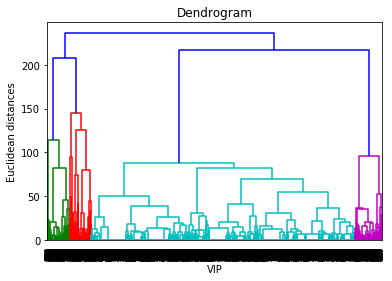

In [88]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X.values, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('VIP')
plt.ylabel('Euclidean distances')
plt.show()

In [89]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward') #연결법: ward
y_hc = hc.fit_predict(X)

In [90]:
dff['result']= y_hc

C:\Users\Yoon\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
dff.groupby('result').mean().loc[:,['DIA_1', 'DIA_2', 'DIA_3', 'DIA_4', 'DIA_5', 'DIA_6', 'GD', 'KIDS']]

,DIA_1,DIA_2,DIA_3,DIA_4,DIA_5,DIA_6,GD,KIDS
result,,,,,,,,
0,0.057778,0.228889,0.382222,1.808889,7.235556,2.435556,1.622222,0.980000
1,0.063395,0.235174,1.247444,8.118609,0.460123,0.010225,1.736196,0.963190
2,0.108391,0.465141,0.644847,0.563420,0.167820,0.027674,1.225120,0.902253
3,0.160000,1.010435,7.299130,1.154783,0.111304,0.064348,1.502609,0.982609


In [12]:
df.groupby('result').median().loc[:,['AMT', 'TR', 'QTY','GD', 'KIDS']].sort_values(by= ['AMT', 'GD', 'KIDS'])

,AMT,TR,QTY,GD,KIDS
result,,,,,
3,13300.0,1.0,1.0,0.0,0.0
2,25060.0,1.0,2.0,2.0,0.0
0,36400.0,1.0,2.0,0.0,1.0
1,60930.0,2.0,4.0,2.0,1.0


In [15]:
df.groupby('result').mean().loc[:,['AMT', 'TR', 'QTY','GD', 'KIDS']].sort_values(by= ['AMT', 'GD', 'KIDS'])

,AMT,TR,QTY,GD,KIDS
result,,,,,
3,26439.204390,1.152263,2.478738,0.000000,0.0
2,55033.692615,1.636727,4.291417,1.758483,0.0
0,74476.255193,2.043027,4.106231,0.238279,1.0
1,146259.024074,3.461111,7.481852,1.999815,1.0


In [14]:
df.groupby('result').count()

,MEM_NO,AMT,TR,QTY,WEB_TR,APP_TR,MOB_TR,WEB_AMT,APP_AMT,MOB_AMT,DIAPER_TR,DBH_FEEDING,DBH_BATH,HOUSEHOLD,WETTISSUE,GREENFG,FEM_GDS,AGE,GD,KIDS
result,,,,,,,,,,,,,,,,,,,,
0,3370,3370,3370,3370,3370,3370,3370,3370,3370,3370,3370,3370,3370,3370,3370,3370,3370,3370,3370,3370
1,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400
2,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501
3,729,729,729,729,729,729,729,729,729,729,729,729,729,729,729,729,729,729,729,729


In [27]:
df.groupby('result').median().loc[:,['AMT', 'DIAPER_TR','DBH_FEEDING', 'DBH_BATH',
       'HOUSEHOLD', 'WETTISSUE', 'GREENFG', 'FEM_GDS' ,'GD', 'KIDS']].sort_values(by= ['AMT', 'GD', 'KIDS'])

,AMT,DIAPER_TR,DBH_FEEDING,DBH_BATH,HOUSEHOLD,WETTISSUE,GREENFG,FEM_GDS,GD,KIDS
result,,,,,,,,,,
3,13300,0,0,0,0,0,0,0,0,0
2,25060,1,0,0,0,0,0,0,2,0
0,36400,1,0,0,0,0,0,0,0,1
1,60890,1,0,0,0,0,0,0,2,1


In [44]:
df.groupby('result').median().loc[:,['DIAPER_TR','DBH_FEEDING', 'DBH_BATH', 'GREENFG', 'GD', 'KIDS']].sort_values(by= ['GD', 'KIDS'])

,DIAPER_TR,DBH_FEEDING,DBH_BATH,GREENFG,GD,KIDS
result,,,,,,
0,0,0,0,0,0,0
2,1,0,0,0,0,1
1,1,0,0,0,2,1


In [45]:
df.groupby('result').mean().loc[:,['DIAPER_TR','DBH_FEEDING', 'DBH_BATH', 'GREENFG', 'GD', 'KIDS']].sort_values(by= ['GD', 'KIDS'])

,DIAPER_TR,DBH_FEEDING,DBH_BATH,GREENFG,GD,KIDS
result,,,,,,
2,1.444972,0.354494,0.204094,0.068526,0.238505,1.0
0,0.643902,0.163415,0.078862,0.121951,0.716260,0.0
1,2.449342,0.616781,0.377292,0.132988,2.000000,1.0


In [35]:
df.groupby('result').mean().loc[:,['DIAPER_TR','DBH_FEEDING', 'DBH_BATH',
       'HOUSEHOLD', 'WETTISSUE', 'GREENFG', 'FEM_GDS' ,'GD', 'KIDS']].sort_values(by= ['GD', 'KIDS'])

,DIAPER_TR,DBH_FEEDING,DBH_BATH,HOUSEHOLD,WETTISSUE,GREENFG,FEM_GDS,GD,KIDS
result,,,,,,,,,
3,0.543210,0.165981,0.074074,0.145405,0.181070,0.090535,0.037037,0.000000,0.0
0,1.457778,0.357926,0.205333,0.083556,0.135704,0.080296,0.034074,0.240889,1.0
2,0.790419,0.159681,0.085828,0.255489,0.287425,0.167665,0.107784,1.758483,0.0
1,2.442076,0.614829,0.376645,0.178869,0.243744,0.125672,0.098054,1.999815,1.0


In [43]:
df.groupby('result').describe().loc[:,['AMT', 'TR', 'QTY','GD', 'KIDS']]

AMT                                                          \
         count           mean            std     min      25%      50%   
result                                                                   
0       3370.0   74476.255193  123140.312984   480.0  10410.0  36400.0   
1       5400.0  146259.024074  221535.985717  2650.0  26280.0  60930.0   
2        501.0   55033.692615  114829.837033  3500.0   9900.0  25060.0   
3        729.0   26439.204390   35210.823506  2390.0   4720.0  13300.0   

                                 GD            ...   QTY             TR  \
             75%        max   count      mean  ...   75%    max   count   
result                                         ...                        
0        78300.0  1350200.0  3370.0  0.238279  ...   5.0   80.0  3370.0   
1       158120.0  2874050.0  5400.0  1.999815  ...   9.0  109.0  5400.0   
2        50700.0  1469170.0   501.0  1.758483  ...   4.0  234.0   501.0   
3        31800.0   267540.0   729.0  0.000000  ...   2.0   35.0   729.0   

                                                      
            mean       std  min  25%  50%  75%   max  
result                                                
0       2.043027  2.402801  1.0  1.0  1.0  2.0  24.0  
1       3.461111  4.089022  1.0  1.0  2.0  4.0  34.0  
2       1.636727  1.990922  1.0  1.0  1.0  1.0  22.0  
3       1.152263  0.654757  1.0  1.0  1.0  1.0  11.0  

[4 rows x 40 columns]

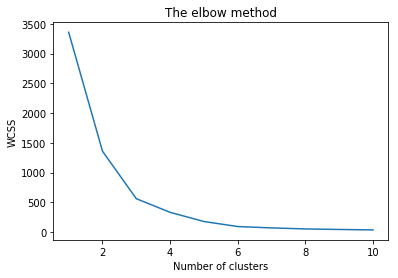

In [44]:
# Using Elbow Method to find the optimal number of K(clusters)
# Inertia value는 군집화가된 후에, 각 중심점에서 군집의 데이타간의 
# 거리를 합산한것이으로 군집의 응집도를 나타내는 값 낮을 수록 응집도가 높음
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
#Applying K-Means to dataset
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=100,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X.values)

In [47]:
df['k_means_result'] = y_kmeans

In [53]:
df.groupby('k_means_result').mean().loc[:,['AMT', 'TR', 'QTY','GD', 'KIDS']].sort_values(by= ['AMT', 'GD', 'KIDS'], ascending = False)

,AMT,TR,QTY,GD,KIDS
k_means_result,,,,,
0,145916.304871,3.457122,7.463049,2.000000,1.0
1,75046.449125,2.049837,4.137348,0.238505,1.0
3,55033.692615,1.636727,4.291417,1.758483,0.0
2,26439.204390,1.152263,2.478738,0.000000,0.0


In [1]:
a = df.groupby('result').mean().loc[:,['AMT', 'TR', 'QTY','GD', 'KIDS']].sort_values(by= ['AMT', 'GD', 'KIDS'], ascending = False)

NameError: name 'df' is not defined